**Problem Statement:**

"To design and implement a machine learning model that predicts the future price of Bitcoin based on historical trends and market dynamics. The goal is to enable data-driven decision-making for cryptocurrency trading, focusing on developing a model that adapts to changing market conditions and provides actionable insights for profitable trading."

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bitcoin_price_prediction_dataset.csv')
df

Price          Open          High           Low      Volume  \
0      10993.428306  10003.142322  11048.614738  10320.802110   88.776932   
1       9725.138120   9197.645296  10119.166358   9984.113436  106.655689   
2      11298.710521  11005.196318  11537.481888  11704.417145   95.857094   
3      13051.059879  13125.894335  12156.519941  12397.741369   64.788483   
4       9538.360139  10050.441303   9408.005928  11450.437952  105.847214   
...             ...           ...           ...           ...         ...   
29995  58838.757410  58487.829180  60114.178897  59475.125738   24.786032   
29996  62884.207800  62334.685657  62415.547057  62921.791116   17.829891   
29997  58993.931924  59064.436993  58786.459566  60250.499751   15.168533   
29998  56213.619629  55122.633209  56395.336992  56634.481720   19.305162   
29999  59542.231582  59539.032789  59404.736234  59377.602897   24.473403   

         Market_Cap  Moving_Avg_7d  Moving_Avg_30d        RSI         MACD  \
0      1.236331e+08   11117.262622    10724.167173  50.000000   324.563279   
1      9.616873e+07   10891.242782    11505.313595  50.016667 -1571.436253   
2      1.021562e+08   10215.234268     9920.369797  50.033334  1379.117339   
3      1.444302e+08   11211.951280    11954.686537  50.050001   888.732414   
4      9.425183e+07   10890.563805    11084.289842  50.066668 -1310.692264   
...             ...            ...             ...        ...          ...   
29995  5.936388e+08   60081.800100    60672.320428  47.311977 -1688.437363   
29996  6.367154e+08   60062.472086    60023.727282  47.328035  2896.911375   
29997  5.861231e+08   60183.332041    59573.440914  47.344099  -735.884780   
29998  5.599604e+08   58814.882034    59723.890269  47.360172 -3527.352476   
29999  5.869627e+08   58490.374631    60096.131358  47.376251  -636.039798   

       Sentiment_Score  
0            65.369862  
1            54.707802  
2            62.709926  
3            59.479735  
4            50.865660  
...                ...  
29995        50.481833  
29996        64.279220  
29997        58.323145  
29998        51.115096  
29999        68.141463  

[30000 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            30000 non-null  float64
 1   Open             30000 non-null  float64
 2   High             30000 non-null  float64
 3   Low              30000 non-null  float64
 4   Volume           30000 non-null  float64
 5   Market_Cap       30000 non-null  float64
 6   Moving_Avg_7d    30000 non-null  float64
 7   Moving_Avg_30d   30000 non-null  float64
 8   RSI              30000 non-null  float64
 9   MACD             30000 non-null  float64
 10  Sentiment_Score  30000 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


In [ ]:
df.isnull().sum()

Price              0
Open               0
High               0
Low                0
Volume             0
Market_Cap         0
Moving_Avg_7d      0
Moving_Avg_30d     0
RSI                0
MACD               0
Sentiment_Score    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Price              30000
Open               30000
High               30000
Low                30000
Volume             30000
Market_Cap         30000
Moving_Avg_7d      30000
Moving_Avg_30d     30000
RSI                30000
MACD               30000
Sentiment_Score    30000
dtype: int64

In [ ]:
df.describe()

Price          Open          High           Low        Volume  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   34999.290201  34999.407934  35002.832063  34996.706136     36.229853   
std    14564.340184  14574.491589  14578.468800  14578.954601     23.130300   
min     3954.146543   3892.981016   2728.868535   2448.199964    -22.184370   
25%    22497.224170  22487.753307  22522.809768  22545.010743     20.363716   
50%    35043.075724  35065.718308  35074.744600  35108.038848     31.162581   
75%    47494.839393  47488.691344  47519.069191  47468.800849     46.947688   
max    65080.330931  65785.448547  65940.725039  66501.827736    256.760992   

         Market_Cap  Moving_Avg_7d  Moving_Avg_30d           RSI  \
count  3.000000e+04   30000.000000    30000.000000  30000.000000   
mean   3.500154e+08   34991.769293    34977.774225     50.006963   
std    1.460846e+08   14449.639769    14439.526145      7.088953   
min    4.634188e+07    7900.411427     8528.796631     40.000000   
25%    2.245940e+08   22524.978393    22420.529963     42.900568   
50%    3.503336e+08   34978.920788    34982.956839     50.082441   
75%    4.751456e+08   47407.163314    47385.021139     57.099636   
max    6.680518e+08   62059.459512    61628.210290     60.000000   

               MACD  Sentiment_Score  
count  30000.000000     30000.000000  
mean      19.803628        59.992220  
std     2032.952743         5.770399  
min    -7821.335129        50.002022  
25%    -1347.864386        55.008525  
50%       22.275180        59.995251  
75%     1398.615626        64.977515  
max     9001.854216        69.998570

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Market_Cap'}>],
       [<Axes: title={'center': 'Moving_Avg_7d'}>,
        <Axes: title={'center': 'Moving_Avg_30d'}>,
        <Axes: title={'center': 'RSI'}>],
       [<Axes: title={'center': 'MACD'}>,
        <Axes: title={'center': 'Sentiment_Score'}>, <Axes: >]],
      dtype=object)

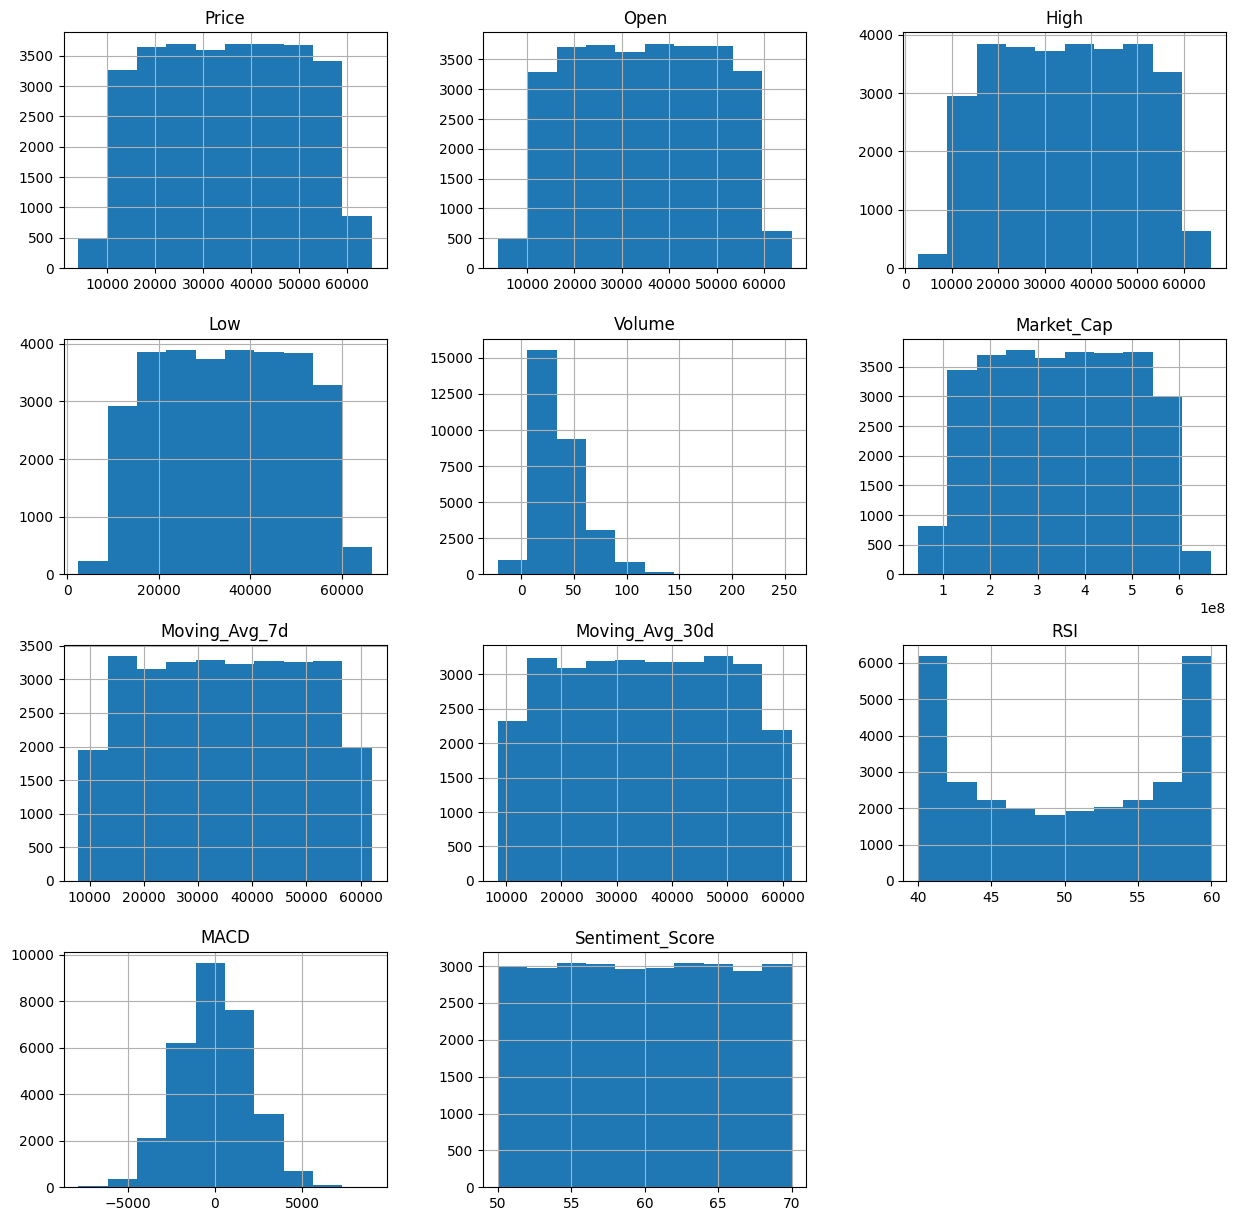

In [ ]:
df.hist(figsize=(15,15))

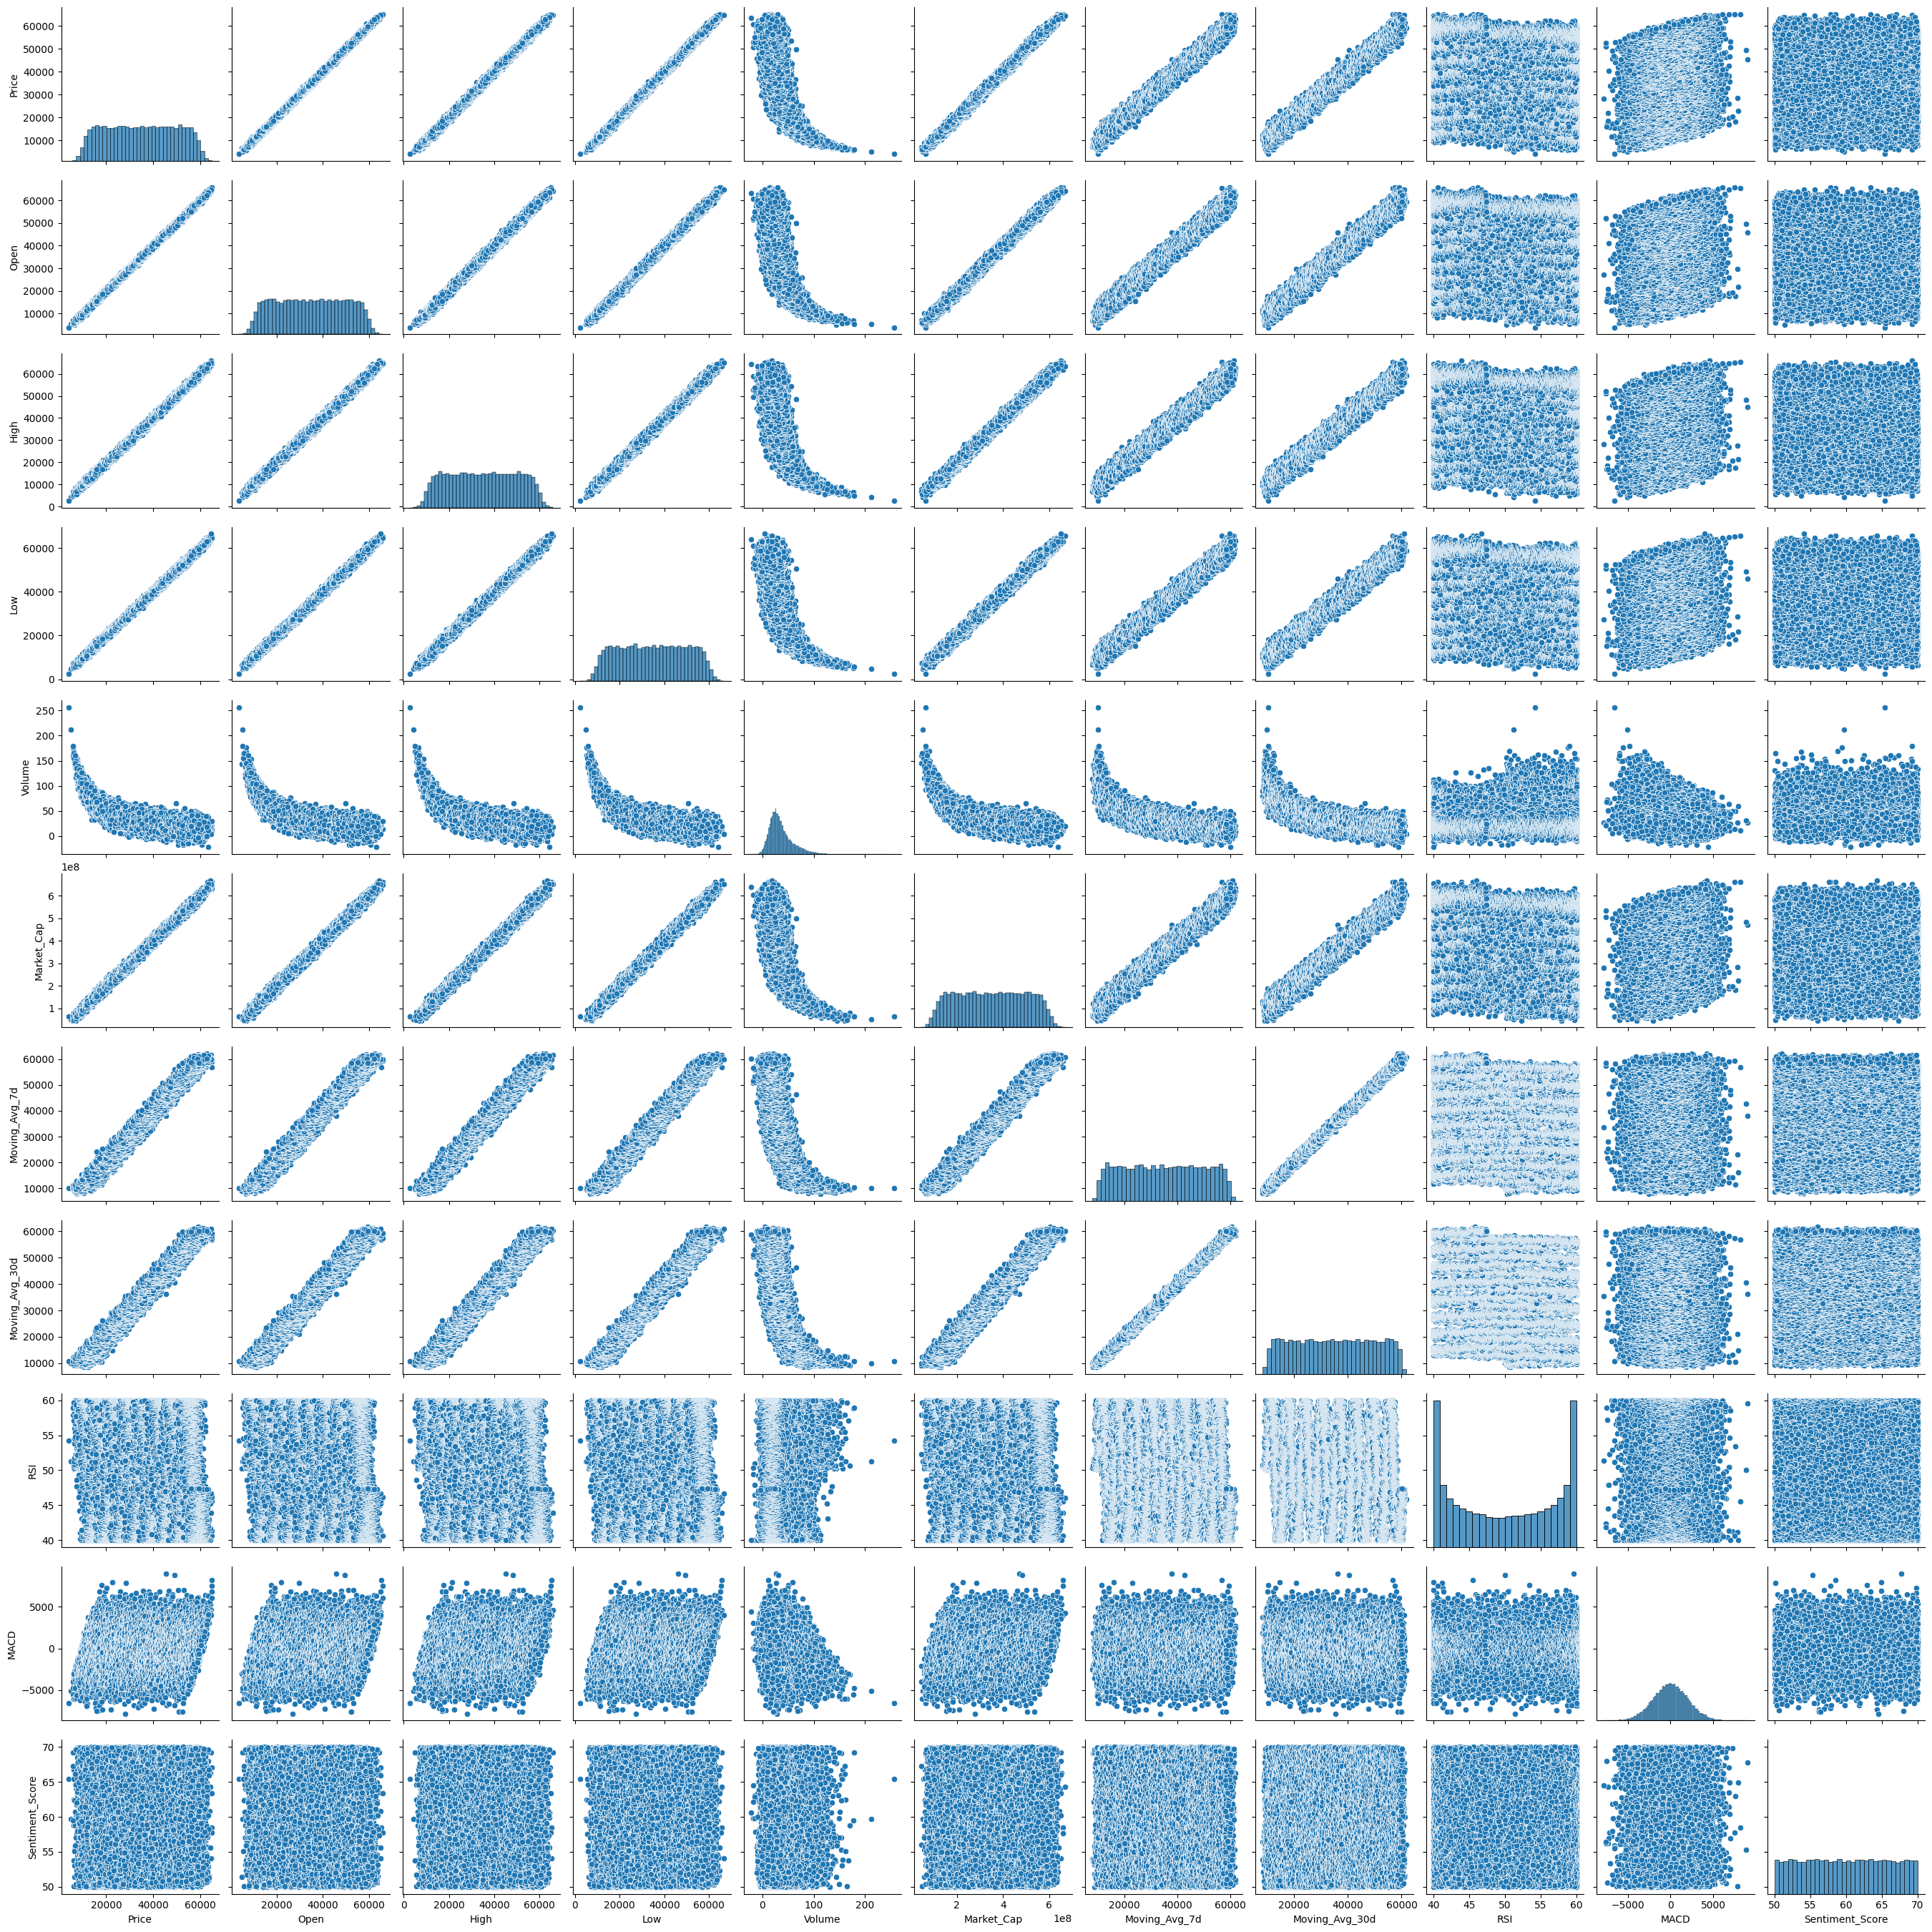

In [ ]:
sns.pairplot(df)

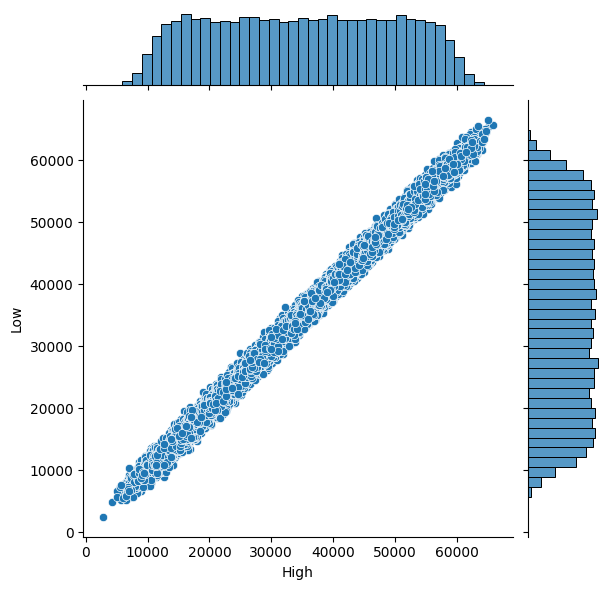

In [ ]:
sns.jointplot(x='High', y='Low', data=df)

<Axes: xlabel='Open', ylabel='Volume'>

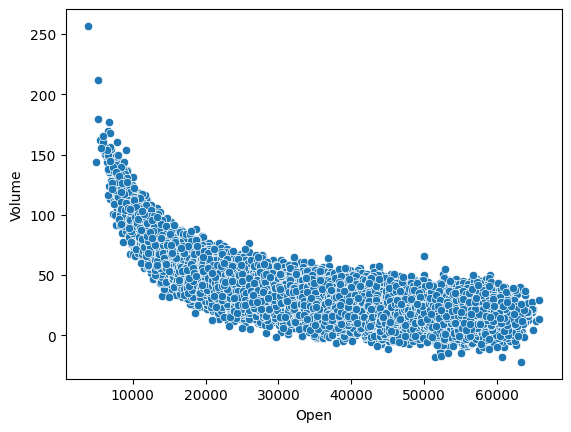

In [ ]:
sns.scatterplot(x='Open', y='Volume', data=df)

<Axes: xlabel='Open', ylabel='Price'>

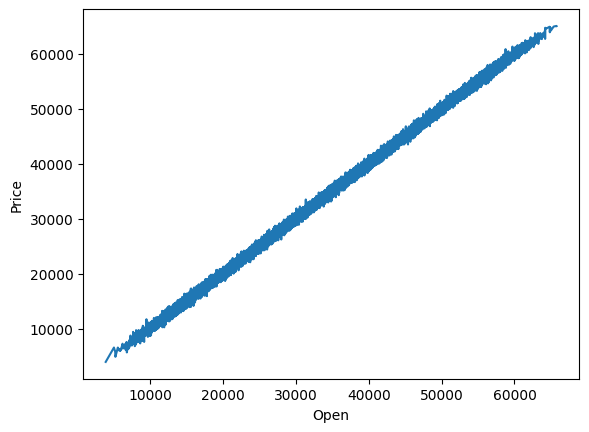

In [ ]:
sns.lineplot(x='Open', y='Price', data=df)

<Axes: xlabel='Moving_Avg_7d', ylabel='Moving_Avg_30d'>

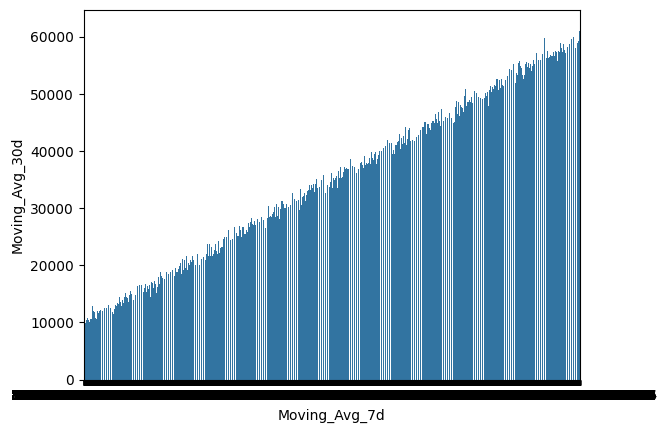

In [ ]:
sns.barplot(x='Moving_Avg_7d', y='Moving_Avg_30d', data=df)

<Axes: xlabel='Open', ylabel='Sentiment_Score'>

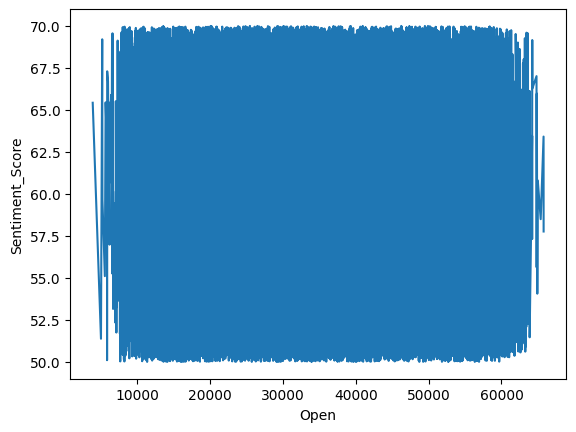

In [ ]:
sns.lineplot(x='Open', y='Sentiment_Score', data=df)

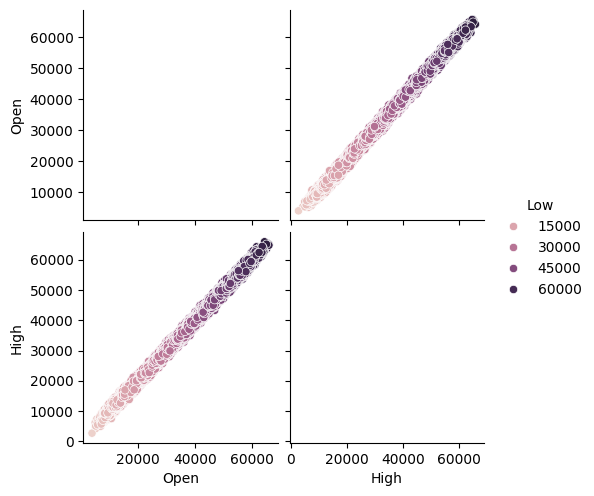

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low']], hue='Low')
plt.show()

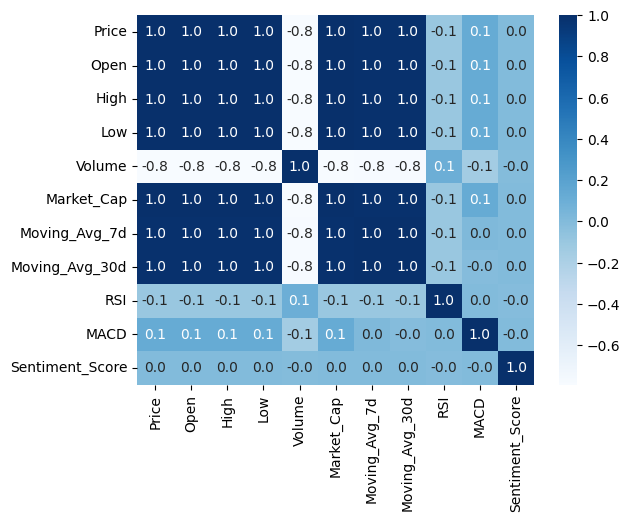

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

In [ ]:
corr_matrix

Price      Open      High       Low    Volume  Market_Cap  \
Price            1.000000  0.999406  0.998846  0.998847 -0.792253    0.997676   
Open             0.999406  1.000000  0.998270  0.998267 -0.791728    0.997072   
High             0.998846  0.998270  1.000000  0.997707 -0.791120    0.996519   
Low              0.998847  0.998267  0.997707  1.000000 -0.791181    0.996507   
Volume          -0.792253 -0.791728 -0.791120 -0.791181  1.000000   -0.790390   
Market_Cap       0.997676  0.997072  0.996519  0.996507 -0.790390    1.000000   
Moving_Avg_7d    0.991703  0.991156  0.990583  0.990559 -0.780618    0.989278   
Moving_Avg_30d   0.990294  0.989746  0.989187  0.989150 -0.778905    0.987840   
RSI             -0.095166 -0.095243 -0.094730 -0.095139  0.099600   -0.094690   
MACD             0.130507  0.130109  0.130084  0.130372 -0.144082    0.131378   
Sentiment_Score  0.002248  0.002472  0.002390  0.002594 -0.003019    0.001474   

                 Moving_Avg_7d  Moving_Avg_30d       RSI      MACD  \
Price                 0.991703        0.990294 -0.095166  0.130507   
Open                  0.991156        0.989746 -0.095243  0.130109   
High                  0.990583        0.989187 -0.094730  0.130084   
Low                   0.990559        0.989150 -0.095139  0.130372   
Volume               -0.780618       -0.778905  0.099600 -0.144082   
Market_Cap            0.989278        0.987840 -0.094690  0.131378   
Moving_Avg_7d         1.000000        0.998186 -0.095845  0.015055   
Moving_Avg_30d        0.998186        1.000000 -0.096000 -0.007879   
RSI                  -0.095845       -0.096000  1.000000  0.000067   
MACD                  0.015055       -0.007879  0.000067  1.000000   
Sentiment_Score       0.002035        0.002299 -0.012518 -0.000513   

                 Sentiment_Score  
Price                   0.002248  
Open                    0.002472  
High                    0.002390  
Low                     0.002594  
Volume                 -0.003019  
Market_Cap              0.001474  
Moving_Avg_7d           0.002035  
Moving_Avg_30d          0.002299  
RSI                    -0.012518  
MACD                   -0.000513  
Sentiment_Score         1.000000

In [ ]:
sor = df.corr()['Price']
sor = sor.sort_values(ascending=False)
sor

Price              1.000000
Open               0.999406
Low                0.998847
High               0.998846
Market_Cap         0.997676
Moving_Avg_7d      0.991703
Moving_Avg_30d     0.990294
MACD               0.130507
Sentiment_Score    0.002248
RSI               -0.095166
Volume            -0.792253
Name: Price, dtype: float64

In [ ]:
df['Volume'] = np.log1p(df['Volume'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Market_Cap'}>],
       [<Axes: title={'center': 'Moving_Avg_7d'}>,
        <Axes: title={'center': 'Moving_Avg_30d'}>,
        <Axes: title={'center': 'RSI'}>],
       [<Axes: title={'center': 'MACD'}>,
        <Axes: title={'center': 'Sentiment_Score'}>, <Axes: >]],
      dtype=object)

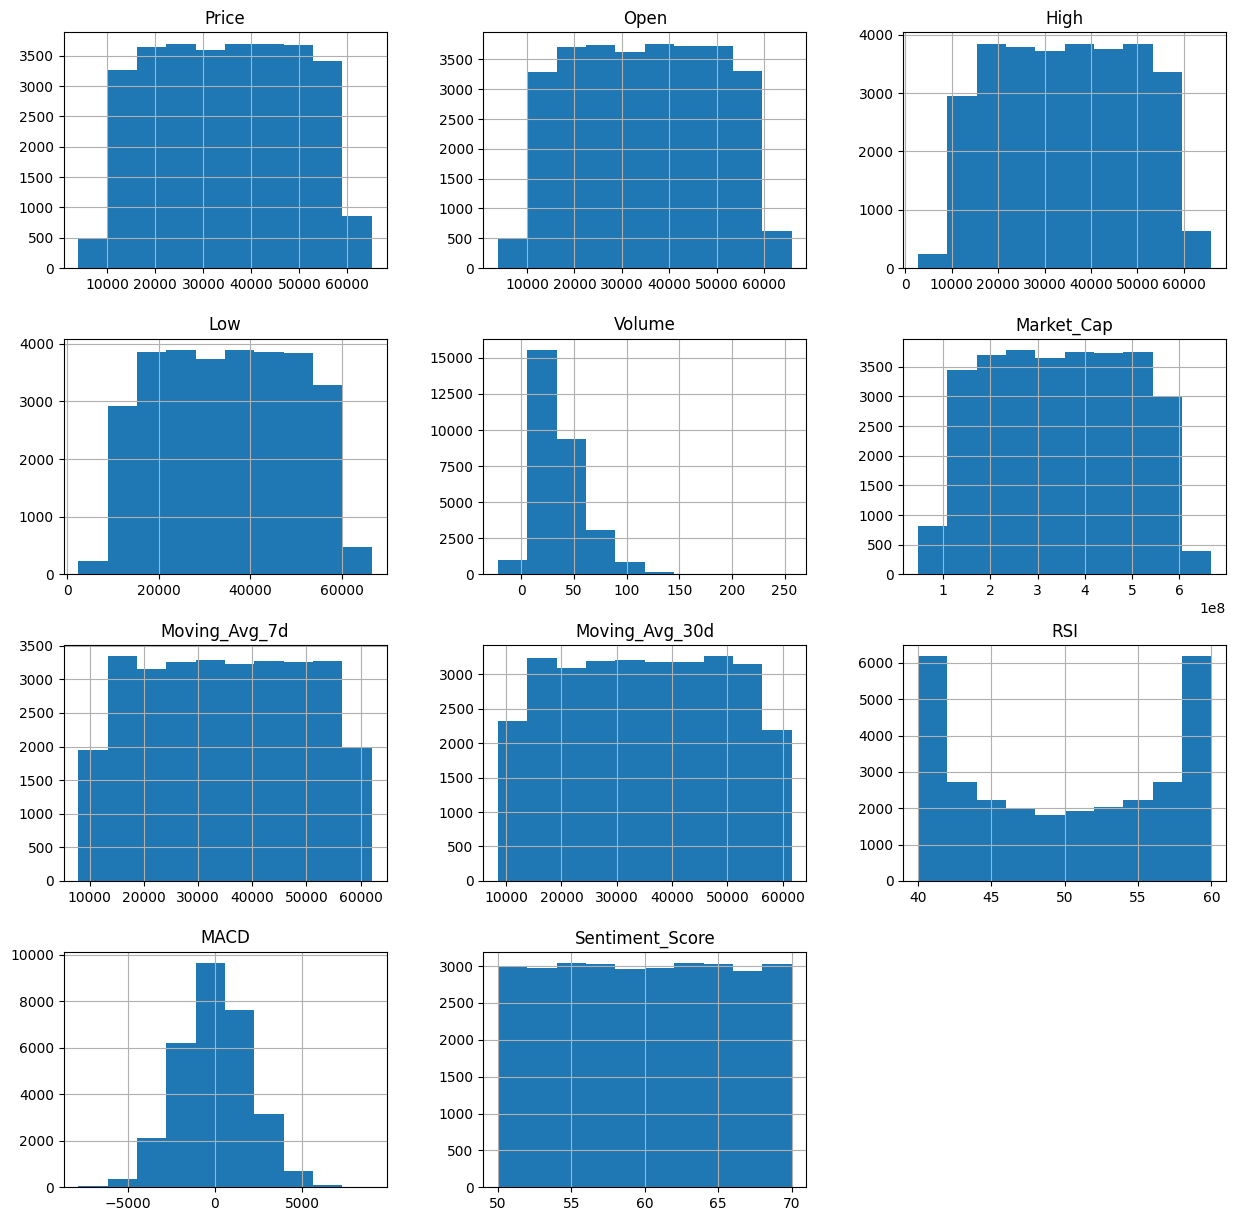

In [ ]:
df.hist(figsize=(15,15))

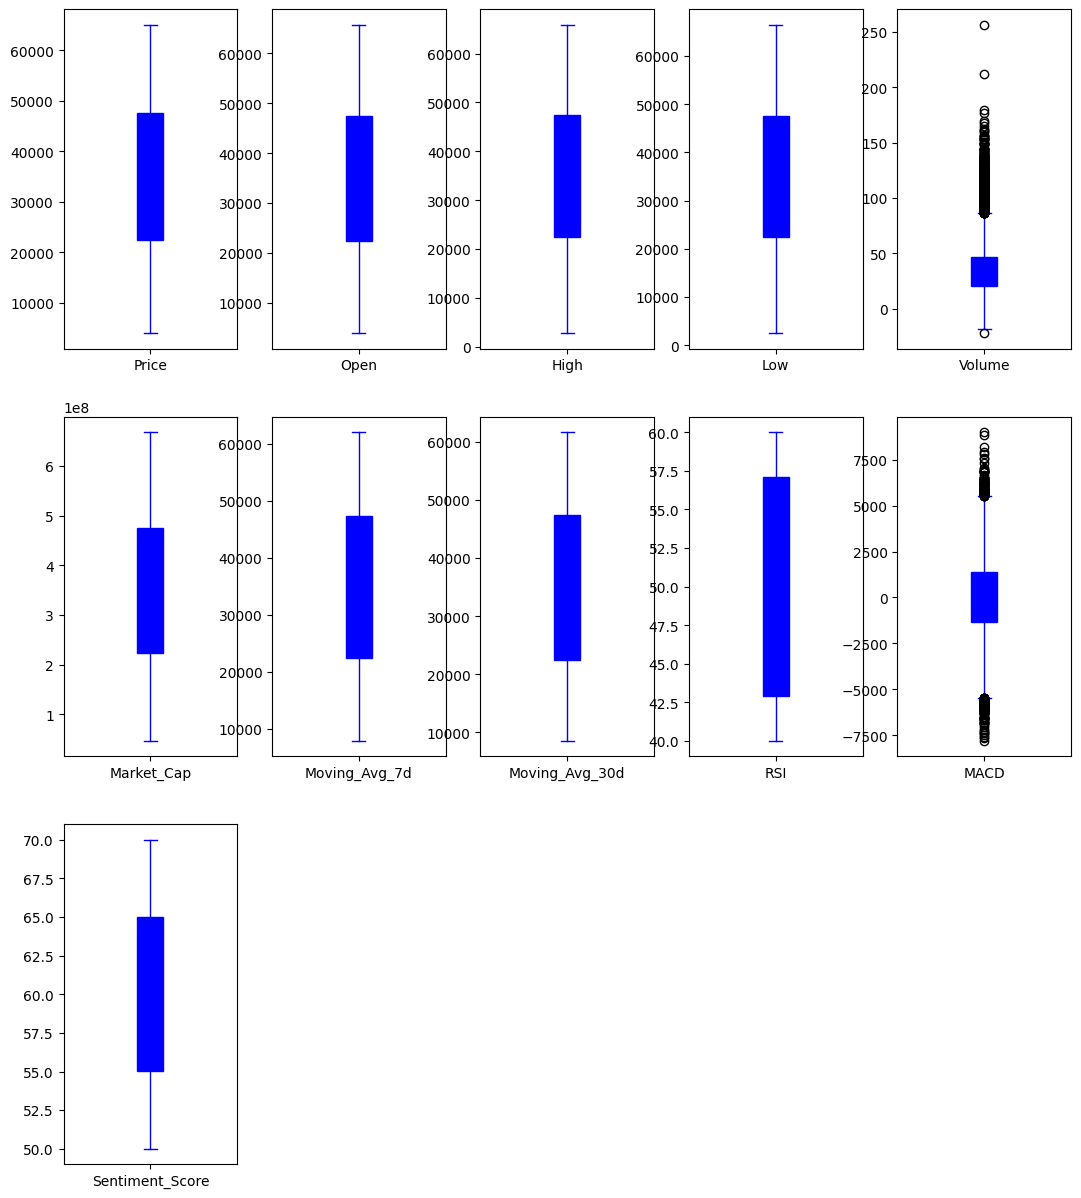

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out


for column in df.select_dtypes(include=np.number).columns:
  df = remove_outliers_iqr(df, column)

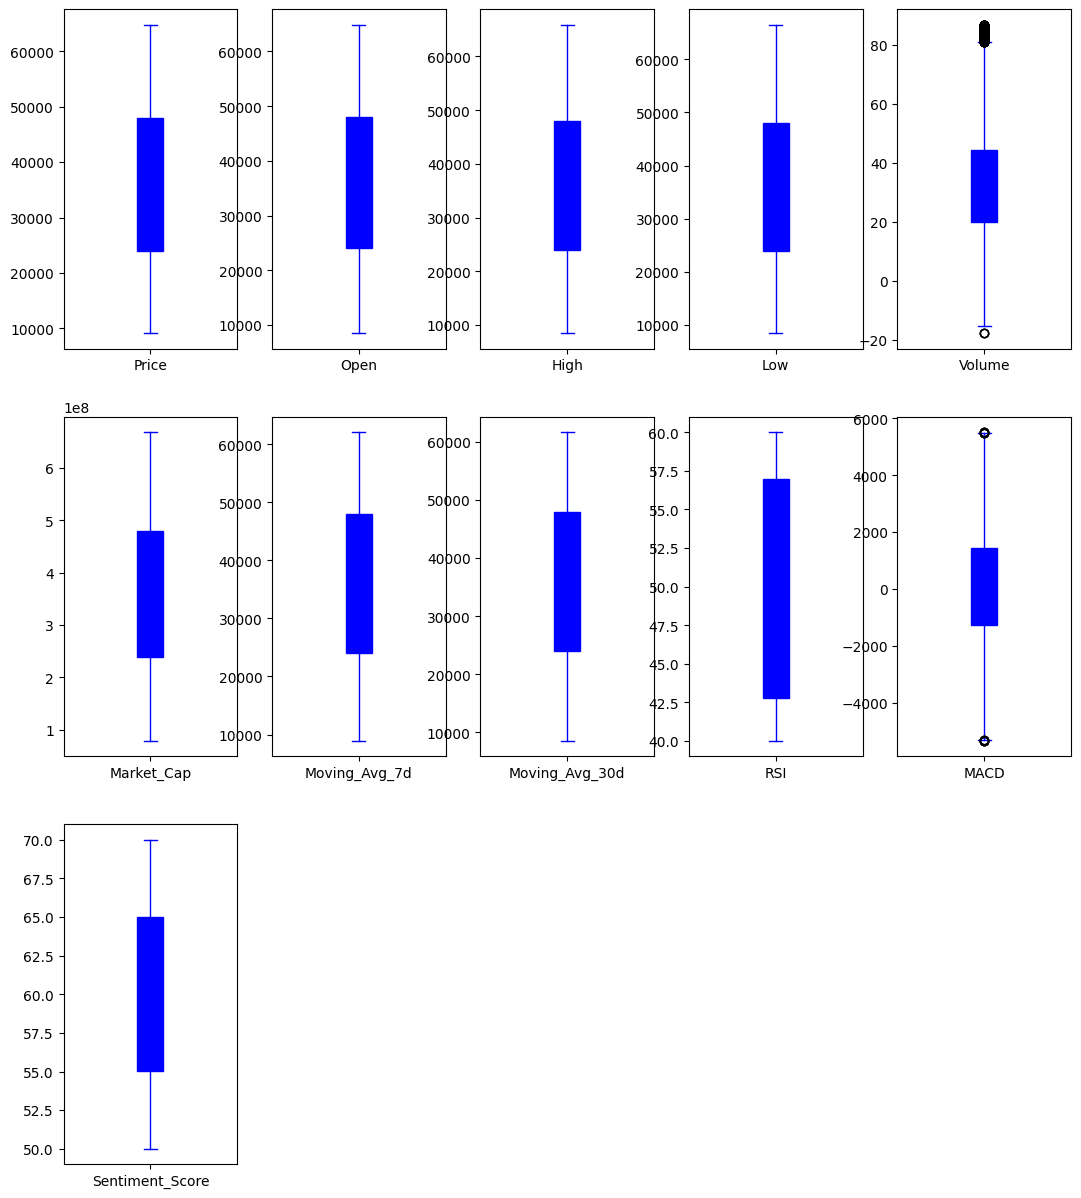

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
df.shape

(28639, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define your features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Market_Cap', 'Moving_Avg_7d', 'Moving_Avg_30d', 'RSI', 'MACD', 'Sentiment_Score']]
y = df['Price']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 29334.698515606648
R^2 Score: 0.9998467309170079


In [ ]:
df


Price          Open          High           Low     Volume  \
3      13051.059879  13125.894335  12156.519941  12397.741369  64.788483   
6      13168.425964  12578.763565  13461.054190  12998.568931  67.576214   
7      11546.536514  11360.680383  10999.227219  10959.914136  80.188993   
9      11100.120587  10969.017025  11740.543063  13006.265786  75.370059   
20     12964.631982  13464.906145  14122.409176  12366.820426  85.806670   
...             ...           ...           ...           ...        ...   
29995  58838.757410  58487.829180  60114.178897  59475.125738  24.786032   
29996  62884.207800  62334.685657  62415.547057  62921.791116  17.829891   
29997  58993.931924  59064.436993  58786.459566  60250.499751  15.168533   
29998  56213.619629  55122.633209  56395.336992  56634.481720  19.305162   
29999  59542.231582  59539.032789  59404.736234  59377.602897  24.473403   

         Market_Cap  Moving_Avg_7d  Moving_Avg_30d        RSI         MACD  \
3      1.444302e+08   11211.951280    11954.686537  50.050001   888.732414   
6      1.405668e+08   11026.876730    11206.170060  50.100002  1912.509565   
7      1.209414e+08   11308.667693    11178.312440  50.116668   469.781044   
9      1.050527e+08   11268.546022    10601.034359  50.149999   484.002975   
20     1.485113e+08    9241.233943     9969.568252  50.333283  2974.960958   
...             ...            ...             ...        ...          ...   
29995  5.936388e+08   60081.800100    60672.320428  47.311977 -1688.437363   
29996  6.367154e+08   60062.472086    60023.727282  47.328035  2896.911375   
29997  5.861231e+08   60183.332041    59573.440914  47.344099  -735.884780   
29998  5.599604e+08   58814.882034    59723.890269  47.360172 -3527.352476   
29999  5.869627e+08   58490.374631    60096.131358  47.376251  -636.039798   

       Sentiment_Score  
3            59.479735  
6            64.839096  
7            50.356771  
9            69.175209  
20           67.178237  
...                ...  
29995        50.481833  
29996        64.279220  
29997        58.323145  
29998        51.115096  
29999        68.141463  

[28639 rows x 11 columns]

In [ ]:
Open = float(input('Enter the Open: '))
High = float(input('Enter the High: '))
Low = float(input('Enter the Low: '))
Volume = float(input('Enter the Volume: '))
Market_Cap = float(input('Enter the Market_Cap: '))
Moving_Avg_7d = float(input('Enter the Moving_Avg_7d: '))
Moving_Avg_30d = float(input('Enter the Moving_Avg_30d: '))
RSI = float(input('Enter the RSI: '))
MACD = float(input('Enter the MACD: '))
Sentiment_Score = float(input('Enter the Sentiment_Score: '))

# Prepare the user input array
user_input = np.array([[Open, High, Low, Volume, Market_Cap, Moving_Avg_7d, Moving_Avg_30d, RSI, MACD, Sentiment_Score]])

# Scale the user input
user_input_scaled = scaler.transform(user_input)

# Predict the Life Expectancy at Birth
Price = model.predict(user_input_scaled)

print(f"Price: {Price[0]}")

Enter the Open: 59539.032789
Enter the High: 59404.736234
Enter the Low: 59377.602897
Enter the Volume: 24.473403
Enter the Market_Cap: 5.869627e+08	
Enter the Moving_Avg_7d: 58490.374631	
Enter the Moving_Avg_30d: 60096.131358	
Enter the RSI: 47.376251	
Enter the MACD: -636.039798	
Enter the Sentiment_Score: 68.141463
Price: 59427.88185930778


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


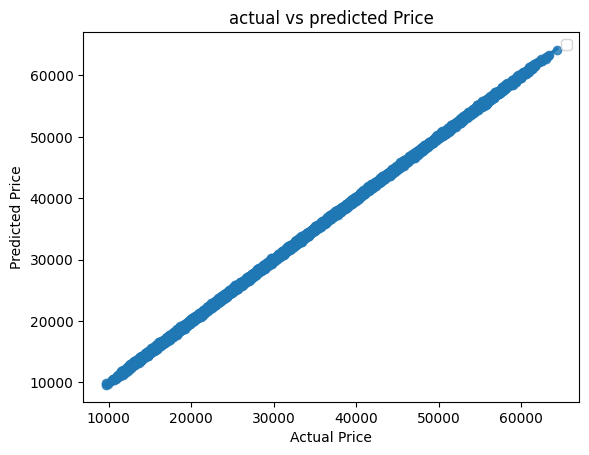

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('actual vs predicted Price')
plt.legend()
plt.show()